# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [64]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [65]:
# Read your api key environment variable
# YOUR CODE HERE!

from newsapi import NewsApiClient

load_dotenv()

api_key = os.getenv("NEWS_API_KEY")

newsapi = NewsApiClient(api_key=api_key)

In [66]:
# Create a newsapi client
# YOUR CODE HERE!

type(newsapi)

type(os.environ["NEWS_API_KEY"])

str

In [67]:
bitcoin_top_headlines = newsapi.get_top_headlines(q="bitcoin", language="en")

bitcoin_top_headlines

{'status': 'ok',
 'totalResults': 9,
 'articles': [{'source': {'id': None, 'name': 'CNBC'},
   'author': 'Arjun Kharpal',
   'title': 'As much as $365 billion wiped off cryptocurrency market after Tesla stops car purchases with bitcoin - CNBC',
   'description': 'Tesla CEO Elon Musk said Tesla would suspend car purchases using bitcoin, wiping off billions of dollars of value from the cryptocurrency market.',
   'url': 'https://www.cnbc.com/2021/05/13/bitcoin-btc-price-falls-after-tesla-stops-car-purchases-with-crypto.html',
   'urlToImage': 'https://image.cnbcfm.com/api/v1/image/106851227-1615297653733-gettyimages-1231424737-widak-teslaand210227_npq97.jpeg?v=1616615846',
   'publishedAt': '2021-05-13T02:26:00Z',
   'content': 'GUANGZHOU, China Hundreds of billions of dollars were wiped off the entire cryptocurrency market after Tesla CEO Elon Musk tweeted that the electric vehicle maker would suspend car purchases using bi… [+2142 chars]'},
  {'source': {'id': None, 'name': 'The Strait

In [68]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

bitcoin_news_en["totalResults"]

# Print total articles 
print(f"Total articles about Bitcoin: {bitcoin_news_en['totalResults']}")

Total articles about Bitcoin: 10788


In [69]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

ethereum_news_en["totalResults"]

# Print total articles 

print(f"Total articles about Ethereum: {ethereum_news_en['totalResults']}")

Total articles about Ethereum: 4381


In [70]:
# Create the bitcoin sentiment scores DataFrame

# Create a function to create the DataFrame

bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text, 
            "date": date, 
            "compound": compound, 
            "positive": pos, 
            "negative": neg, 
            "neutral": neu
        })
        
    except AttributeError as error:
            print(f"Error", {error})
            
# Create DataFrame

bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns 
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000
3,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
4,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816


In [71]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

# Create a function to create the DataFrame

ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text, 
            "date": date, 
            "compound": compound, 
            "positive": pos, 
            "negative": neg, 
            "neutral": neu
        })
        
    except AttributeError as error:
            print(f"Error", {error})
            
# Create DataFrame

ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns 
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940
1,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829
3,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.000,0.966
4,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000


In [72]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

# Get descriptive stats from the DataFrame

bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.325535,0.087700,0.012850,0.899500
std,0.349802,0.075245,0.026867,0.080753
min,-0.476700,0.000000,0.000000,0.777000
25%,0.000000,0.000000,0.000000,0.824750
50%,0.342950,0.071000,0.000000,0.924000
75%,0.634375,0.160250,0.000000,0.974500
max,0.845500,0.217000,0.081000,1.000000


In [73]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

# Get descriptive stats from the DataFrame

ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.131840,0.044850,0.009250,0.94590
std,0.285022,0.058756,0.029097,0.06369
min,-0.340000,0.000000,0.000000,0.79000
25%,0.000000,0.000000,0.000000,0.92400
50%,0.012900,0.036000,0.000000,0.95800
75%,0.238025,0.060500,0.000000,1.00000
max,0.817600,0.210000,0.111000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score. 

Q: Which coin had the highest compound score?

A: Bitcoin and Ethereum were tied for the compound score. 

Q. Which coin had the highest positive score?

A: The highest positive score was also a tie between Bitcoin and Ethereum. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [74]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [75]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# stopwords.words('english')

sw = set(stopwords.words('english'))
print(sw)

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

sw_addon = {'said', 'as' 'it'}

{'over', 'because', 'i', 'me', 'between', 'don', 'yours', "needn't", 'mustn', 'didn', 'there', 'an', 'but', 'they', 'won', 'only', 've', "you'd", 'each', 'those', 'being', 'when', 'd', 'we', 'should', 'few', 'from', 'were', 'so', 'them', 'theirs', 'ma', 'their', 'which', 'too', 'up', 'haven', 'isn', 'am', 'whom', 'in', 'both', 'having', 'of', 'doesn', "mustn't", 'my', 'above', 'can', 'ours', 'same', 'yourselves', 'is', 'was', 'shan', 'on', "hadn't", 'now', 'him', 'most', 'this', 'where', 'off', 'below', 'if', 't', 'wouldn', 'down', "won't", 'against', 'then', "you'll", 'the', 'what', 's', 'y', "she's", 'themselves', 'about', 'why', 'itself', 'through', 'hadn', 'he', 'myself', 'than', 'did', 'other', 'more', 'your', 'no', "doesn't", 'own', "wasn't", 'for', 'been', "that'll", 'and', 'these', 'at', 'here', 'm', 'ain', 'very', 'nor', "you've", 'mightn', 'into', 'before', "don't", 'not', "you're", 'that', 'shouldn', 'with', 'to', 'by', 'any', "didn't", 'doing', 'wasn', "mightn't", 'during',

In [76]:
len(stopwords.words())

6800

In [77]:
# Complete the tokenizer function 

def tokenizer(text):
    """Tokenizez text."""
    # Remove the punctuation from text & turns any character that is not a letter into an empty string
    regex_f = re.compile("[^a-zA-Z ]")
    clean_f = regex_f.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(clean_f)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    # Remove the stop words
    return tokens

In [79]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)

bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, tesla, started, accepting, bitcoin, cur..."
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942,"[shares, square, today, american, fintech, com..."
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000,"[teslas, relationship, bitcoin, dalliance, acc..."
3,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
4,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, ha, stopped, accepting, ..."


In [80]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)

ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835,"[investor, call, disruptive, innovator, detrac..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
3,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.000,0.966,"[venmo, jumping, aboard, cryptocurrency, bandw..."
4,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000,"[new, york, cnn, businessbitcoin, price, conti..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [81]:
from collections import Counter
from nltk import ngrams

In [82]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

N = 2
N_gram_btc = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(N_gram_btc).most_common(20)

[(('elon', 'musk'), 4),
 (('accepting', 'bitcoin'), 3),
 (('charsby', 'reuters'), 3),
 (('tesla', 'ha'), 2),
 (('fossil', 'fuel'), 2),
 (('ceo', 'elon'), 2),
 (('price', 'continued'), 2),
 (('ha', 'seen'), 2),
 (('institutional', 'investor'), 2),
 (('microstrategy', 'inc'), 2),
 (('inc', 'major'), 2),
 (('major', 'bitcoin'), 2),
 (('bitcoin', 'corporate'), 2),
 (('corporate', 'backer'), 2),
 (('backer', 'monday'), 2),
 (('monday', 'nonemployee'), 2),
 (('nonemployee', 'director'), 2),
 (('director', 'get'), 2),
 (('get', 'fee'), 2),
 (('fee', 'service'), 2)]

In [83]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

N = 2 
N_gram_eth = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(N_gram_eth).most_common(20)

[(('bitcoin', 'ethereum'), 3),
 (('charsby', 'reuters'), 3),
 (('representation', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'ethereum'), 3),
 (('ethereum', 'seen'), 3),
 (('seen', 'front'), 3),
 (('front', 'stock'), 3),
 (('stock', 'graph'), 3),
 (('graph', 'illustration'), 3),
 (('illustration', 'taken'), 3),
 (('taken', 'february'), 3),
 (('february', 'reutersdado'), 3),
 (('ether', 'hit'), 3),
 (('hit', 'record'), 3),
 (('record', 'high'), 3),
 (('may', 'reuters'), 3),
 (('digital', 'currency'), 3),
 (('vitalik', 'buterin'), 2),
 (('charsnew', 'york'), 2)]

In [84]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [85]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

btc_tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(btc_tokens, 10)

[('bitcoin', 14),
 ('ha', 8),
 ('tesla', 7),
 ('musk', 6),
 ('reuters', 5),
 ('elon', 4),
 ('company', 4),
 ('monday', 4),
 ('service', 4),
 ('cryptocurrency', 4)]

In [86]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

eth_tokens = tokenizer(ethereum_df.text.str.cat())
token_count(eth_tokens, 10)

[('ethereum', 10),
 ('reuters', 6),
 ('currency', 6),
 ('bitcoin', 5),
 ('cryptocurrency', 5),
 ('ha', 5),
 ('stock', 5),
 ('project', 4),
 ('major', 4),
 ('ether', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

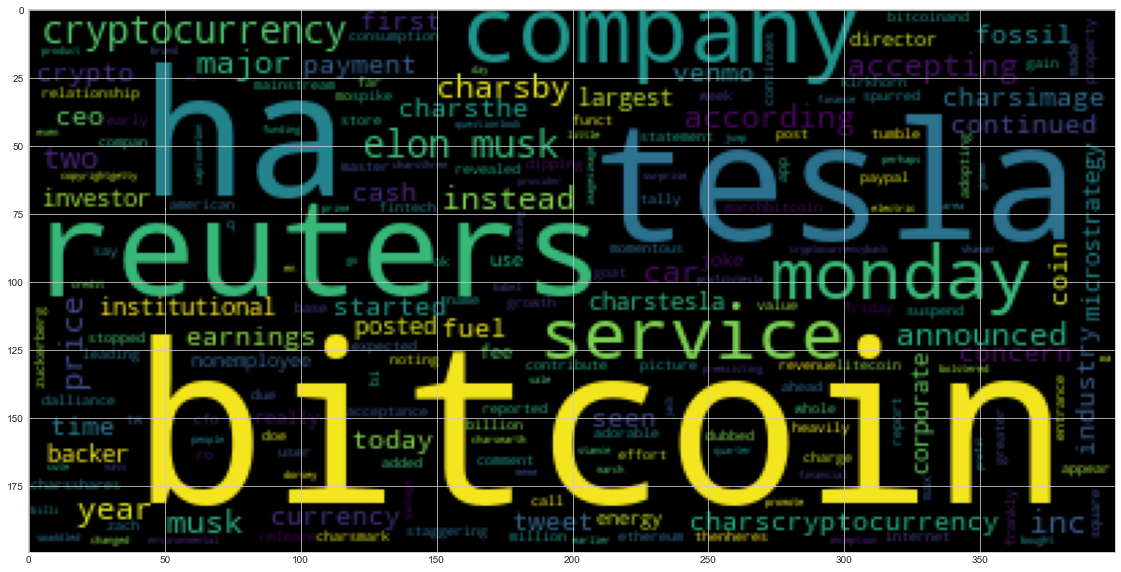

In [107]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!


btc_string = " ".join(btc_tokens)

wcount = WordCloud().generate(btc_string)
plt.imshow(wcount)

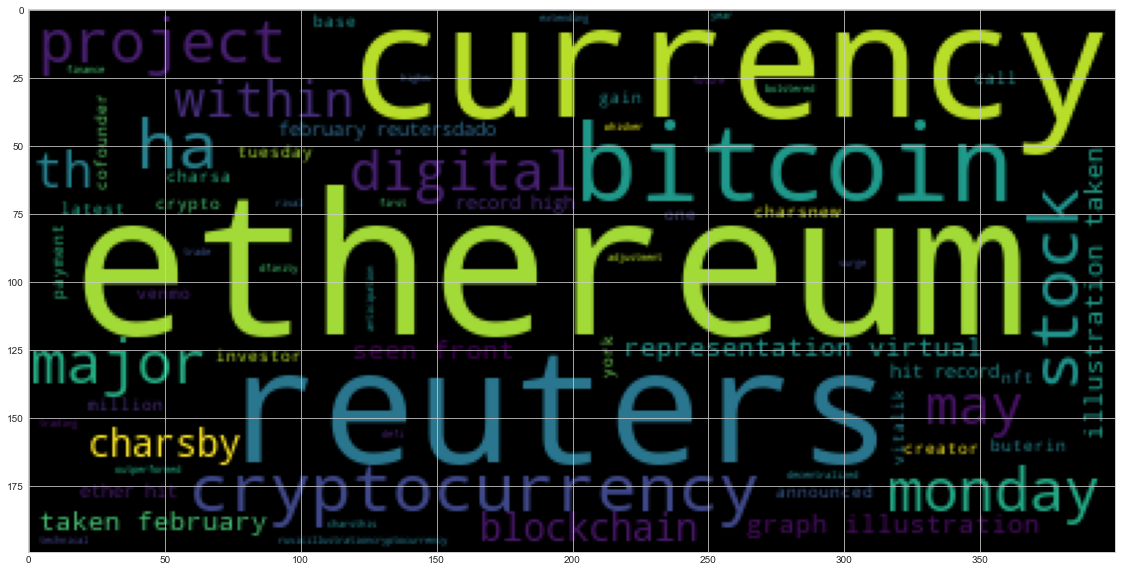

In [108]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!


eth_string = " ".join(eth_tokens)

wcount = WordCloud().generate(eth_string)
plt.imshow(wcount)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [110]:
pip install -U spacy


  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=14c0b57e6131c237041be9342a23447623a1f79f7e359a4e48f57588f336a54f
  Stored in directory: c:\users\alish\appdata\local\pip\cache\wheels\11\73\9a\f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open


In [116]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [117]:
import spacy
from spacy import displacy

In [118]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [119]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

bitcoin_articles = bitcoin_df.text.str.cat()

bitcoin_articles

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumptio

In [120]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

ner_btc = nlp(bitcoin_articles)

# Add a title to the document
# YOUR CODE HERE!

ner_btc.user_data["title"] = "Bitcoin NER"

In [121]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(ner_btc, style='ent')

In [127]:
# List all Entities
# YOUR CODE HERE!

for ent in ner_btc.ents:
    print(ent.text, ent.label_)

Just weeks DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Square FAC
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Tesla ORG
Elon Musk PERSON
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
a momentous year DATE
2020 DATE
Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
Jack Dorsey PERSON
Babel Finance ORG
Monday DATE
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Musk PERSON
Dogecoin GPE
Twitter PRODUCT
Doge

---

### Ethereum NER

In [123]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

ethereum_articles = ethereum_df.text.str.cat()

ethereum_articles

'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest

In [124]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

ner_eth = nlp(ethereum_articles)

# Add a title to the document
# YOUR CODE HERE!

ner_eth.user_data["title"] = "Ethereum NER"

In [125]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(ner_eth, style='ent')

In [126]:
# List all Entities
# YOUR CODE HERE!

for ent in ner_eth.ents:
    print(ent.text, ent.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Topps GPE
first ORDINAL
NFT ORG
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuter

---